In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import graph

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8x9n4kg2 because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<div class="alert alert-info">
    
<img src="graph-example.png" style="width: 16%; float:right;margin-left:4em; clear:both;">
    
<h1>Graphs</h1>

<p>In graph theory, a graph is a set of nodes ("vertices") that are connected to one another with edges. This first example is a graph with 4 nodes and 5 edges.
</p>
    
    
<p>
Graphs are general enough to be used in many different applications: they can represent connections between friends on social networks or roads and intersections when looking at maps (calculating turn-by-turn directions involves <a href="https://blogs.cornell.edu/info2040/2011/09/14/google-maps-its-just-one-big-graph/">solving a graph problem!)</a>.</p>
    
    
<h2>Adjacency Matrix</h2>

    
<p>As almost everything else in Linear Algebra, we can represent a graph using a matrix.  For an undirected graph with $n$ nodes, the adjacency matrix ${\bf A} \in \mathbb{R}^{n \times n}$ is such that:  </p>
    
$${\bf A}_{i,j} = \begin{cases} 1 & \text{if nodes } i \text{ and } j \text { share a common edge} \\ 0 & \text{otherwise} \end{cases}$$
    
    
<p>More generally, for a directed graph with $n$ nodes, the adjacency matrix ${\bf A} \in \mathbb{R}^{n \times n}$ is such that:  </p>
    
$${\bf A}_{i,j} = \begin{cases} 1 & \text{if } G \text{ contains an edge from node } j \text{ to node } i \\ 0 & \text{otherwise} \end{cases}$$
  
    
<br/>   

<p>
    We must have some strict ordering on the nodes in order to create the adjacency matrix.
    We may think of the columns of ${\bf A}$ as the outgoing edges and the rows of ${\bf A}$ as the incoming edges. For example, ${\bf A}_{0,2}$ stores whether there is an edge from node $2$ to node $0$.</p>

  
</div>


## Example 1:

**Check your answers:**

Write the adjacency matrix that generates the undirected graph illustrated above. Store the matrix as a 2d numpy array of integers and assign it to the variable `A`.

In [2]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A = np.array( [[0, 1, 1, 0], [1, 1, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0] ] )

A_squared = np.dot(A, A)
A_cubed = np.dot(A_squared, A)
print( A_squared )
print( A_cubed )

[[2 2 1 1]
 [2 3 2 1]
 [1 2 3 0]
 [1 1 0 1]]
[[3 5 5 1]
 [5 7 6 2]
 [5 6 3 3]
 [1 2 3 0]]


You can use the function `graph.draw_matrix` to make the graph from a given adjacency matrix:

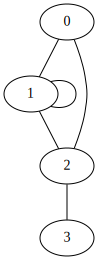

In [3]:
graph.draw_matrix(A, show_weights=False)

Note that any nonzero value along the main diagonal results in a *self loop*.

In this example, the graph is undirected, so its edges do not have direction. The adjacency matrix ${\bf A}$ of an undirected graph is always *symmetric*; that is, ${\bf A}^T = {\bf A}$.


## Graph Walks

A **walk of length $k$** is a sequence of $k+1$ vertices and $k$ edges between two nodes (including the start and end) that *may* repeat. 

**Note that the adjacency matrix gives the number of walks of length 1 between every pair of nodes.**
In the previous example, there is a single walk of length 1 from node 0 to node 1 since $A_{1,0} = 1$; similarly there is a single walk of length 1 from node 1 to itself since $A_{1,1} = 1$. Essentially, the adjacency matrix tells you if you can walk from one node to another in one step.

**Discuss with your group:** Trace the edges and count the number of **walks of length k** between the following nodes. 

a) node 2 to node 3: <u> &nbsp;&nbsp;   X &nbsp;&nbsp; </u>&nbsp; walks of length 2

b) node 2 to node 2: <u> &nbsp;&nbsp;   Y &nbsp;&nbsp; </u>&nbsp; walks of length 3

c) node 1 to node 3: <u> &nbsp;&nbsp;   Z &nbsp;&nbsp; </u>&nbsp; walks of length 2

d) node 3 to node 1: <u> &nbsp;&nbsp;   W &nbsp;&nbsp; </u>&nbsp; walks of length 3


**Check your answers:**

Enter your results in the grade cell below. 
For example, question a) asks for in how many distinct ways can one move from node 2 to node 3 in two steps.

In [5]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
X = 0
Y = 3
Z = 1
W = 2

**Try this!** 

Since the adjacency matrix ${\bf A}$ tells us which node pairs we can move between via a walk of length 1, what does the matrix product ${\bf A A}$ tell us? Define the variable `A2` as this product.

In [6]:
A2 = ...

Indeed, the entry $\left({\bf A}^2\right)_{i,j}$ represents how many ways we can move from node $j$ to node $i$ via a walk of length 2 (i.e. in two steps).

**Try this!** 

Discuss the following questions with your group:

1. Use `A2` to check if your answers from questions a) and c) above were correct.

2. What would you need to do to verify your answers from questions b) and d)?

3. Use the given function `graph.draw_matrix` to plot `A2`. You can use the attribute `show_weights=True`. How does this depiction reflect your previous answers?

In [7]:
graph.draw_matrix(A2, show_weights=True)

AttributeError: 'ellipsis' object has no attribute 'shape'

For example, $\left({\bf A}^2\right)_{2,3} = 0$ tells us nodes $2$ and $3$ are not connected in the graph captured by ${\bf A}^2$, since we cannot reach node 2 from node 3 via a **walk of length 2** in the original graph. This conclusion is also reflected in the above graph.

<div class="alert alert-info">
    
**The number of walks of length exactly $k$ from node $j$ to node $i$ is by given by $({\bf A}^k)_{i,j}$.**

</div>

## Example 2:

The graph below shows the number of walks of length 1 between any two nodes


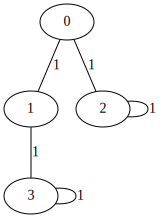

In [8]:
B = np.array([[0, 1, 1, 0],
              [1, 0, 0, 1],
              [1, 0, 1, 0],
              [0, 1, 0, 1]])
print('The graph below shows the number of walks of length 1 between any two nodes')
graph.draw_matrix(B, show_weights=True)

For the given adjacency matrix ${\bf B}$ above, what if we are interested in finding some node in **up to $k$ steps**?  The issue here is that if a node is reached in $ n < k $ steps, we are forced to move off of it at the next step.  

The graph below shows the number of walks of length 2 between any two nodes


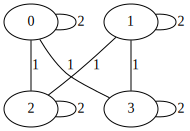

The graph below shows the number of walks of length 3 between any two nodes


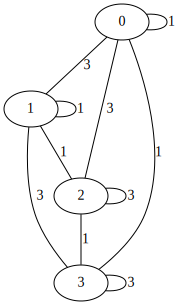

In [9]:
print('The graph below shows the number of walks of length 2 between any two nodes')
graph.draw_matrix(B@B, show_weights=True)
print('The graph below shows the number of walks of length 3 between any two nodes')
graph.draw_matrix(B@B@B, show_weights=True)

By inspecting the above plots, we find that **from node 0 to node 1** we have:

- <u> &nbsp;&nbsp;  one &nbsp;&nbsp;</u>&nbsp; *walk of length 1*

- <u> &nbsp;&nbsp;  zero &nbsp;&nbsp;</u>&nbsp; *walks of length 2*

- <u> &nbsp;&nbsp;  three &nbsp;&nbsp;</u>&nbsp; *walks of length 3*


This occurs because when node 1 is reached, it must be left in the following step. So if we reach a node sooner than in the desired number of steps, how can we adjust the graph to allow us to remain on that node until the desired step count?

**We can add self-loops!**

Take a look at the graph for the identity matrix:

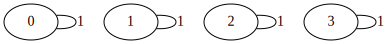

In [10]:
graph.draw_matrix(np.eye(4, dtype=int))

**Check your answers:**

Modify the matrix ${\bf B}$ by adding a self-loop to each node (even if there is already a self-loop present). Store the modified matrix in ${\bf Bi}$.

In [11]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
Bi = B + np.eye(4)

Note that by adding self-loops, `Bi` expresses the same pairs of distinct nodes that may be reached via a walk of length 1 as does `B`. The difference is only in the number of walks of length 1 from each node $i$ to itself.

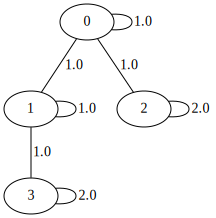

In [12]:
graph.draw_matrix(Bi)

### Number of Steps in Walk

In the previous examples we were picking arbitrary values of $k$ for our walks.

**What if we want to find the smallest value of $k$ such that each node is connected to every other node? If such a $k$ exists, we say the graph is fully connected.**


Let's look at a few scenarios here.  In this first example, all nodes are connected with each other.

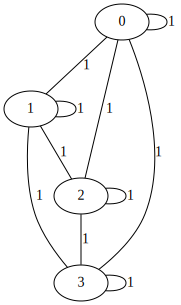

In [13]:
n = 4
C = np.ones((n, n), dtype=int)
graph.draw_matrix(C, show_weights=True)

For the example above, we can see that any node can reach another node with a walk of length 1, and hence the smallest value of $k$ is $k=1$.


Let's look at this other example (we use [numpy.eye](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) to define matrices with 1s in the upper and lower diagonals)

[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


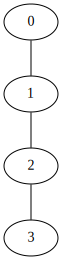

In [14]:
n = 4
D = np.eye(n, k=-1, dtype=int) + np.eye(n, k=1, dtype=int)
print(D)
graph.draw_matrix(D, show_weights=False)

**Check your answers:**

Modify the matrix $D$ above, such that each node can also move to itself. Store that as the variable `Di`

In [15]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
Di = D + np.eye(4)

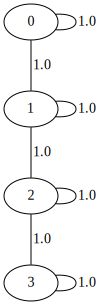

In [16]:
graph.draw_matrix(Di, show_weights=True)

We do not yet have a graph that is fully connected. That is, we cannot reach every node from any other node via a walk of length 1.

What if we want to consider the connections that can be reached with up to walks of length 2? 

**Try it!**

Add to `Di` the matrix that represents walks of length 2. Save it as `Di2`. 

Do you still get entries that are zero, indicating that not all nodes can be reached from any node in up to 2 steps?

In [17]:
Di2 = ...
graph.draw_matrix(Di2, show_weights=True)

AttributeError: 'ellipsis' object has no attribute 'shape'

Did you get a fully connected graph when considering walks of length at most 2?

Keep adding $D^k$ until you find the necessary $k$ value.

<div class="alert alert-info">
    
In summary, every node of a connected graph ${\bf G}$ is connected to every other node via walks of length at most $k$ when $k$ is such that the matrix

$$ {\bf I} + \sum_{i=1}^k {\bf G}^i $$

does not contain any 0 entries.

This matrix captures the number of distinct walks of length at most $k$ between each pair of nodes. Without ${\bf I}$, the sum of matrices represents the non-trivial such walks.

</div>

### Edge-node Incidence Matrix

Now, we consider directed graphs and define them according to their adjacency matrices.
The edge-node incidence matrix ${\bf M}$ of the directed graph ${\bf G}$ is a $m \times n$ matrix such that:

$${\bf M}_{i,j} = \begin{cases} -1 & \text{if edge } i \text{ leaves node } j \\ 1 & \text{if edge } i \text{ enters node } j \\ 0 & \text{otherwise} \end{cases}$$


where $m$ is the number of edges and $n$ is the number of nodes. Note that establishes an ordering on the edges.

Consider the adjacency matrix below:

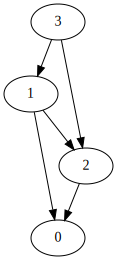

In [18]:
G = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 0, 0]]
)

graph.draw_matrix(G, show_weights=False)

A corresponding edge-node incidence matrix is:

In [19]:
M = np.array([
    [1, -1,  0,  0],
    [1,  0, -1,  0],
    [0,  1,  0, -1],
    [0, -1,  1,  0],
    [0,  0,  1, -1]
])

We can use the function below to get an edge-node incidence matrix corresponding to a given adjacency matrix:

In [20]:
def get_incidence_matrix(G):
    # G: the adjacency matrix
    n = len(G) # number of nodes
    m = np.count_nonzero(G) # number of edges
    M = np.zeros((m,n)).astype(int)
    l = 0
    for i in range(n):
        for j in range(n):
            if ((G[i,j] != 0) & (i!=j)):
                M[l,i] = 1
                M[l,j] = -1
                l += 1
    return M

get_incidence_matrix(G)            

array([[ 1, -1,  0,  0],
       [ 1,  0, -1,  0],
       [ 0,  1,  0, -1],
       [ 0, -1,  1,  0],
       [ 0,  0,  1, -1]])

### Disconnected Graphs and Connected Components:

Here we have a graph with two "groups" of nodes that are connected to each other.  These are called *connected components*, and we say this graph has two connected components.

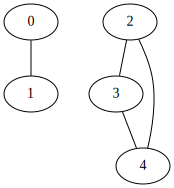

In [8]:
G2 = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 1, 0, 1],
    [0, 0, 1, 1, 0]
])

graph.draw_matrix(G2, show_weights=False)

<div class="alert alert-warning">
The number of connected components of the the graph $G$ is given by the $\textrm{dim Nul}(M)$, where $M$ is the corresponding edge-node incidence matrix.
</div>

In [9]:
M2 = get_incidence_matrix(G2)
M2

NameError: name 'get_incidence_matrix' is not defined

**Think about this:** Why does the incidence matrix have 8 rows?

We will use the SymPy library for symbolic mathematics to obtain the nullspace. We construct the function `nullspace` which takes the 2d NumPy array `A` and returns a 2d numpy array representing the nullspace of the matrix captured by `A`.

In [23]:
import sympy as sp

In [24]:
def nullspace(A):
    MatrixA = sp.Matrix(A) 
    MatrixN = MatrixA.nullspace()
    Null_A = np.array(np.array(MatrixN, np.float)).T  
    return Null_A[0]

In [25]:
null_M2 = nullspace(M2)
null_M2

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Each column of the nullspace of the matrix represents a basis element for the nullspace of the incidence matrix. As you can see, the dimension (number of columns) of the nullspace above is 2, which gives the number of connected components.

In [26]:
null_M2.shape[1]

2

The number of nodes in each connected component is given by the count of 1 entries in each nullspace coluimn. We can compute the columnwise sum of a nullspace matrix as follows:

In [27]:
null_M2.sum(axis=0)

array([2., 3.])

The first connected component comprises 2 nodes while the second connected component comprises 3 nodes.

# Social Network Analysis

One interesting application of graphs is exploring how people are friends with each other on social media, a process called [*social network analysis*](https://en.wikipedia.org/wiki/Social_network_analysis).  By modeling people as nodes and connecting them with edges if they are friends, we can model several properties of the network.

<img src="social_network.png" width="500px">
<br><center><small>(http://www.kakadu-works.com/myfnetwork/welcome.html)</small></center>

Let's imagine we have a random subset of $50$ people, some of whom are friends with each other, and we would like to determine groups of friends within the social network. The function below will create your matrix representing the social network as an adjacency matrix.

In [4]:
n = 50
friends = graph.gen_random_friends(n)

We can visualize the social network in a graph format:

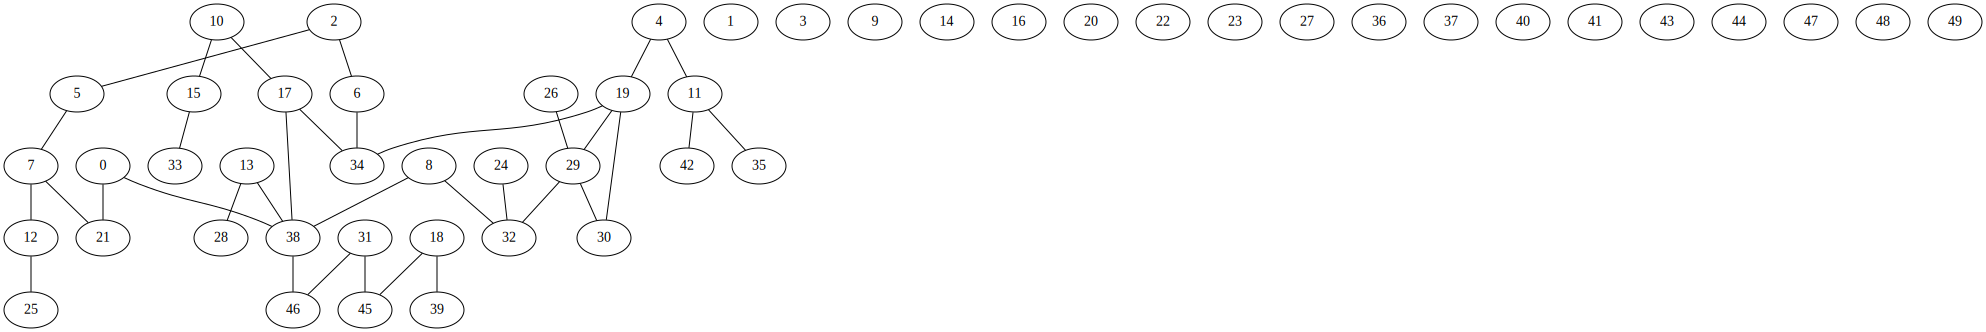

In [5]:
graph.draw_matrix(friends, show_weights=False)

Now we need to find all the separate friend groups.  Because we are defining friend groups as including "friends of friends", we just need to find the connected components!

**Check your answers:**

Define the variable `n_group_friends` as the number of distinct friend groups (i.e. the number of connected components of the graph).

In [30]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
incidence_matrix = get_incidence_matrix(friends)

null_friends = nullspace(incidence_matrix)
n_group_friends = null_friends.shape[1]
n_group_friends

13

**Check your answers:**

How many people are in the largest friend group? Store this number as `max_group_size`

In [31]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
max_group_size = max(null_friends.sum(axis=0))
max_group_size

32.0

## Meme Spread

Let's examine a slightly different problem.  If we are given a friend graph as we have above, how many people will receive a meme assuming each person sends it to all of their friends?

<img src="meme.jpg" width="300px"><br><center><small>(Meme stolen from [reddit.com/r/mathmemes](https://www.reddit.com/r/mathmemes/comments/f9qvhm/linear_algebra_in_nutshell/))</small></center>

We will use a slightly larger graph of $n=100$ people, represented as an adjacency matrix.

In [6]:
n = 100
meme_network = graph.gen_random_friends(n, 0.98)

Here is the (quite large!) graph showing friend connectivity:

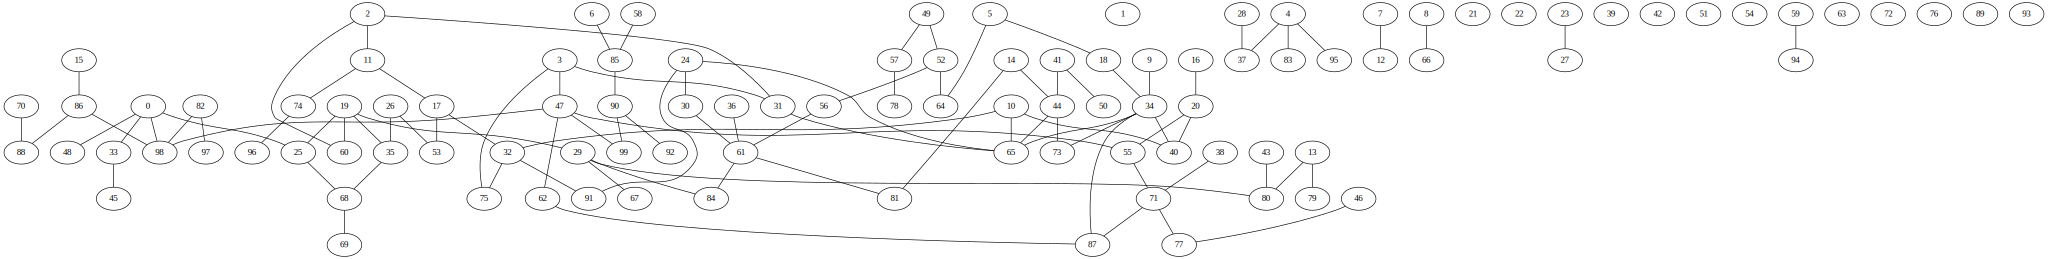

In [7]:
graph.draw_matrix(meme_network, show_weights=False)

**Check your answers:**

Suppose the meme was created (or reposted) by person `origin`, which is provided at the PrairieLearn question page. Note that `origin` is zero-indexed. Assume that everybody sends the meme to all of their friends.

How many friend groups exist in this network? Store that in `ngroups`.

What is the size of each one of these groups? Save your results as a 1d numpy array `nfriends_pergroup`.

How many people will receive the meme? Store that in `receive_meme`.

Hint: first find the friend group to which person `origin` belongs. Then find how many friends belong to that group. You can use [`np.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to help you get `receive_meme`. 

In [37]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
origin = 94
meme_incidence_matrix = get_incidence_matrix(meme_network)

null_meme = nullspace(meme_incidence_matrix)
ngroups = null_meme.shape[1]

nfriends_pergroup = null_meme.sum(axis=0)


origin_row = null_meme[origin]
origin_group = np.where(origin_row == 1)

print(origin_group[0][0])

group_num = origin_group[0][0]
receive_meme = nfriends_pergroup[group_num]

18


In [131]:
receive_meme

88.0